# Comparison of different Classification Algorithms



In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix

from main import normalize_data, metrics
from metrics.githubMetrics import GithubMetrics, metricCollection
from importer.datasetImporter import DatasetImporter

In [3]:
importer = DatasetImporter('data/testset.csv')
X = importer.data
y = importer.target
X = normalize_data(X)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

X[:5]

,avg_entropy,file_count,watcher_count,hw_terminology_files,open_issue_count,edu_mail_ratio,forks_count,html_count,file_folder_ratio,hw_terminology_commits,up_to_dateness,repo_size,avg_folder_depth
0,0.322404,0.409197,0.772168,0.000000,0.636011,0.007613,0.568261,0.00000,0.331291,0.625959,0.037555,0.752610,0.253263
1,0.339089,0.141231,0.752539,0.000000,0.151493,0.000000,0.534208,0.00000,0.083033,0.000000,0.716388,0.369781,0.332797
2,0.484873,0.488173,0.000000,0.000000,0.000000,0.016060,0.000000,0.32868,0.276246,0.356850,0.624008,0.734456,0.236008
3,0.298806,0.347670,0.000000,0.195343,0.000000,0.000000,0.000000,0.00000,0.171756,0.000000,0.565590,0.373380,0.754238
4,0.330835,0.353873,0.000000,0.000000,0.000000,0.034765,0.000000,0.00000,0.210963,0.087303,0.874553,0.508380,0.534904


## Helper

In [4]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [5]:
def analyze_results(model):
    print('acc train:', model.score(X_train, y_train))
    print('acc test:', model.score(X_test, y_test))
    plot_confusion_matrix(confusion_matrix(y_test, model.predict(X_test)), np.unique(y_test))

In [6]:
def null_acc(y):
    return max([len(y[y == x]) for x in np.unique(y)]) / len(y)

In [7]:
print('acc train:', null_acc(y_train))
print('acc test:', null_acc(y_test))

acc train: 0.38
acc test: 0.36486486486486486


## Logistic Regression

In [8]:
logreg = sklearn.linear_model.LogisticRegression(C=1.0, max_iter=100, n_jobs=2)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=2,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

acc train: 0.513333333333
acc test: 0.459459459459
Confusion matrix, without normalization
[[ 0 11  0  0  0  1  0]
 [ 0 49  0  0  2  3  0]
 [ 2 10  0  0  0  1  0]
 [ 2 15  0  2  1  1  0]
 [ 0 13  0  0  2  2  0]
 [ 0 11  0  0  1 15  0]
 [ 0  4  0  0  0  0  0]]


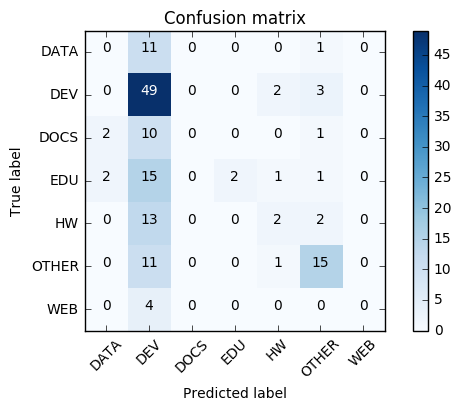

In [9]:
analyze_results(logreg)

## SVM

In [10]:
svm = sklearn.svm.SVC(C=20.0, random_state=1337)
svm.fit(X_train, y_train)

SVC(C=20.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1337, shrinking=True,
  tol=0.001, verbose=False)

acc train: 0.573333333333
acc test: 0.5
Confusion matrix, without normalization
[[ 3  7  0  0  0  2  0]
 [ 1 45  0  0  1  7  0]
 [ 3  9  0  0  0  1  0]
 [ 5  4  0  5  5  2  0]
 [ 0  7  0  0  5  5  0]
 [ 1  7  0  0  3 16  0]
 [ 0  4  0  0  0  0  0]]


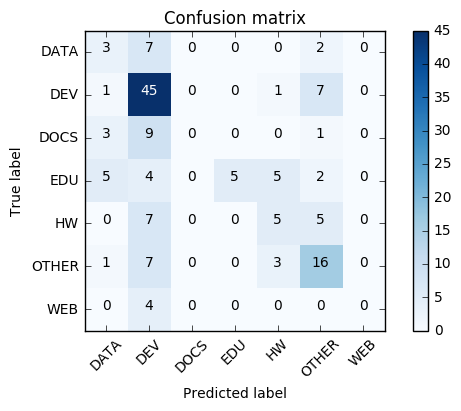

In [11]:
analyze_results(svm)

## DecisionTree

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=1337)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1337, splitter='best')

acc train: 0.99
acc test: 0.466216216216
Confusion matrix, without normalization
[[ 4  2  5  0  0  1  0]
 [ 3 37  2  2  6  1  3]
 [ 3  1  5  1  0  2  1]
 [ 3  5  3  4  3  3  0]
 [ 1  6  2  2  3  3  0]
 [ 2  7  1  1  1 15  0]
 [ 0  2  0  1  0  0  1]]


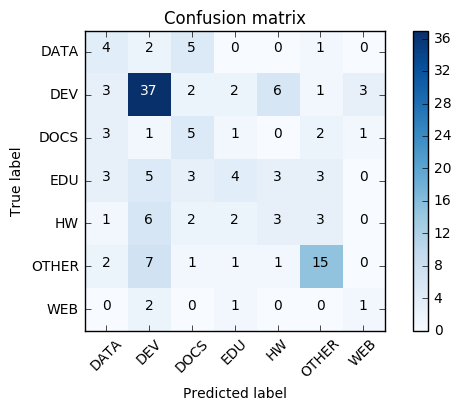

In [13]:
analyze_results(dtc)

## Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=1337)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=1337,
            verbose=0, warm_start=False)

acc train: 0.99
acc test: 0.567567567568
Confusion matrix, without normalization
[[ 6  4  1  0  0  1  0]
 [ 0 52  0  0  0  2  0]
 [ 3  7  1  0  0  1  1]
 [ 3  6  1  4  4  3  0]
 [ 1  7  0  0  4  5  0]
 [ 1  8  0  0  1 17  0]
 [ 0  4  0  0  0  0  0]]


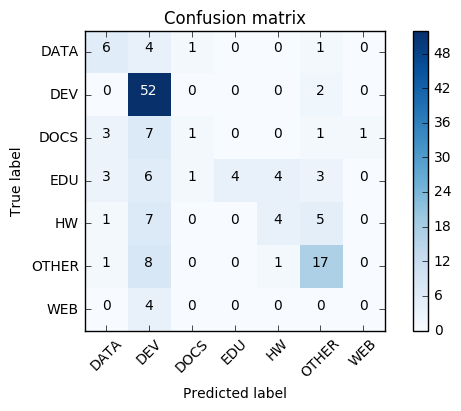

In [15]:
analyze_results(rf)

## NN

In [16]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=2000, hidden_layer_sizes=(100,), random_state=1337)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1337,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

acc train: 0.676666666667
acc test: 0.533783783784
Confusion matrix, without normalization
[[ 5  3  1  1  0  2  0]
 [ 1 44  0  0  4  5  0]
 [ 3  6  3  0  0  1  0]
 [ 4  5  0  4  5  3  0]
 [ 0  6  0  1  6  4  0]
 [ 0  7  0  1  2 17  0]
 [ 0  4  0  0  0  0  0]]


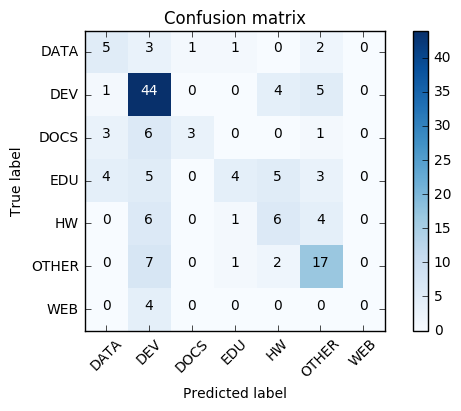

In [17]:
analyze_results(mlp)

## Two Step Stuff

In [18]:
from customClassifier.TwoStepClassifier import TwoStepClassifier
tsc = TwoStepClassifier(
    sklearn.linear_model.LogisticRegression(C=1.0, max_iter=100, n_jobs=2),
    RandomForestClassifier(n_estimators=100, random_state=1337)
)
tsc.fit(X_train, y_train)

acc train: 0.7
acc test: 0.418918918919
Confusion matrix, without normalization
[[ 7  2  1  0  1  1  0]
 [ 4 21  9  0  7  6  7]
 [ 4  2  3  0  1  1  2]
 [ 4  1  4  4  5  2  1]
 [ 0  2  2  0  8  4  1]
 [ 3  1  2  1  2 17  1]
 [ 0  2  0  0  0  0  2]]


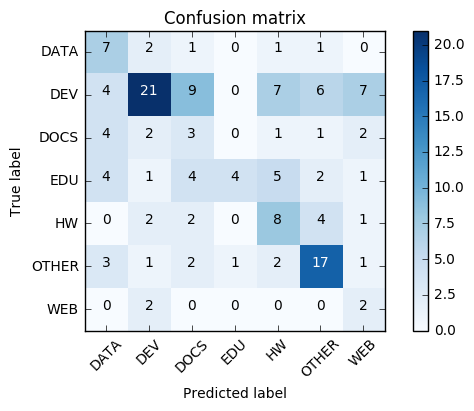

In [19]:
analyze_results(tsc)

# Gradient Boosting

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate=0.15, random_state=1337)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.15, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=1337,
              subsample=1.0, verbose=0, warm_start=False)

acc train: 0.99
acc test: 0.52027027027
Confusion matrix, without normalization
[[ 4  3  4  0  0  1  0]
 [ 1 45  1  0  3  2  2]
 [ 4  6  1  0  0  1  1]
 [ 3  6  2  5  3  2  0]
 [ 0  6  2  0  7  2  0]
 [ 1  9  0  1  1 15  0]
 [ 0  4  0  0  0  0  0]]


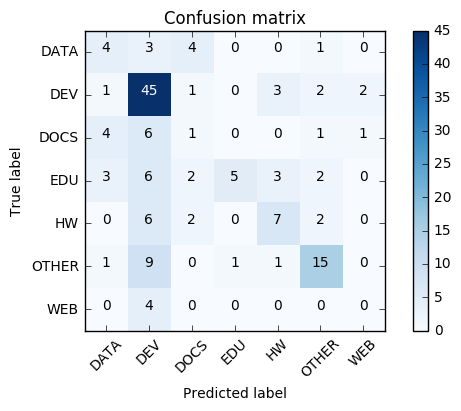

In [21]:
analyze_results(gbc)